


<h1>NOTEBOOK 3 - Análise Descritiva dos Dados </h1>

Esse notebook apresenta as etapas de análise e exploração dos dados do TCC

# Importação dos dados e das bibliotecas

## Importação das bibliotecas

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,5

In [2]:
# Eliminando os warnings das bibliotecas
import warnings
warnings.filterwarnings("ignore")

## Importando as séries de vazão e precipitação

In [3]:
#Importando o arquivo csv para o formato de datframe
df= pd.read_csv('df.csv',index_col='Data',parse_dates=True)

# Exploração estatística da série de vazões

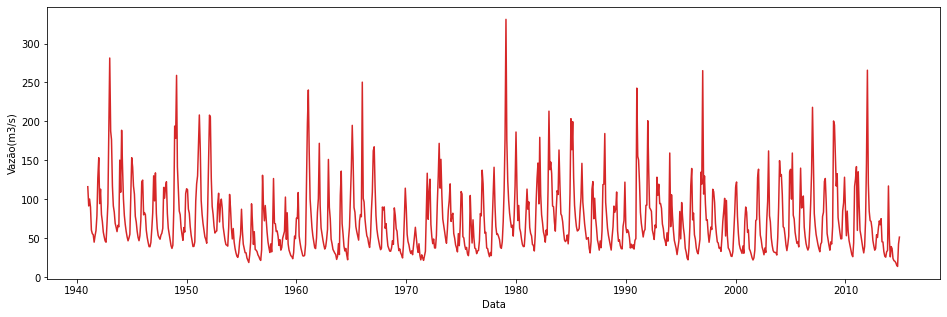

In [55]:
#Plotando a série de vazões
plt.plot(df['Vazao'], color='tab:red')
plt.ylabel('Vazão(m3/s)')
plt.xlabel('Data')
plt.show()

In [5]:
#Estatística básica da série de vazões
df['Vazao'].describe()

count    888.000000
mean      72.765328
std       42.738083
min       14.057913
25%       42.521165
50%       59.726307
75%       90.874411
max      330.987889
Name: Vazao, dtype: float64

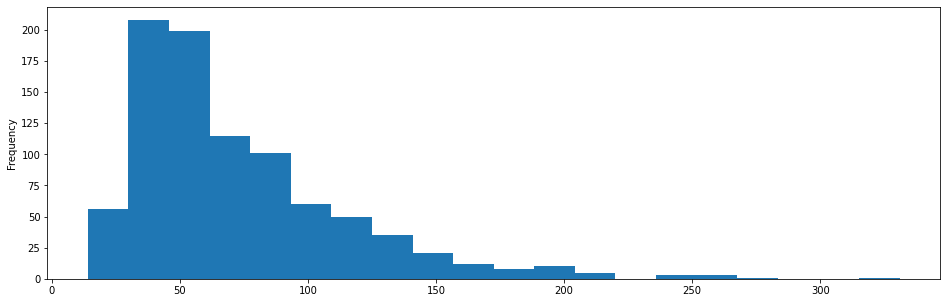

In [32]:
#Histograma de vazões
df['Vazao'].plot.hist(bins = 20)
plt.show()

In [8]:
df['Vazao'].skew()

1.7387038522909002

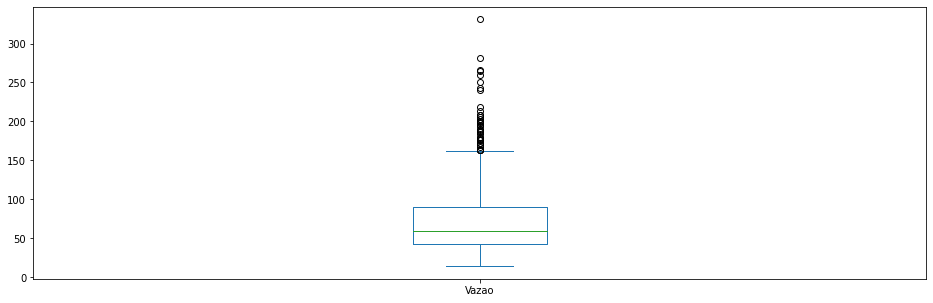

In [34]:
#Diagrama Box Plot da série de vazões
df['Vazao'].plot.box()
plt.show()

In [36]:
#Incluindo os campos mês e ano
df['ano'] = [d.year for d in df.index]
df['mes'] = [d.strftime('%b') for d in df.index]
years = df['ano'].unique()

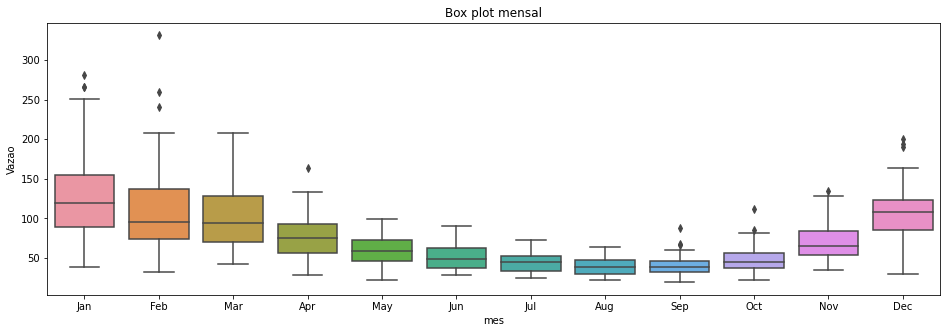

In [37]:
#Fazendo o box plot por mês
sns.boxplot(x='mes', y='Vazao', data=df.loc[~df.ano.isin([1941, 2014]), :],).set_title('Box plot mensal')
plt.show()

# Exploração estatística da série de precipitações

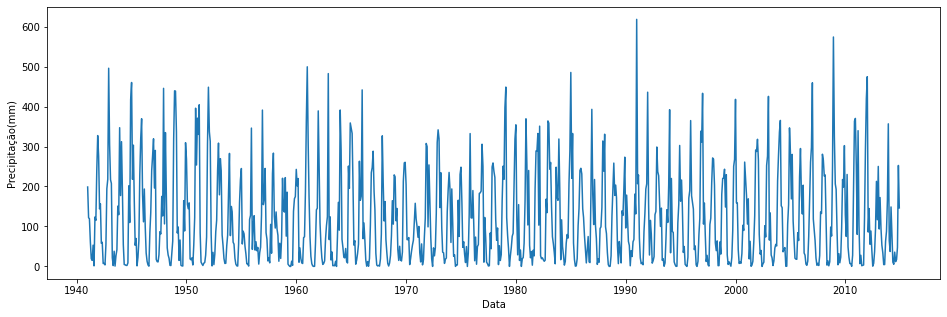

In [38]:
#Plotando a série de precipitações
plt.plot(df['Precipitacao'], color='tab:blue')
plt.ylabel('Precipitação(mm)')
plt.xlabel('Data')
plt.show()

In [39]:
#Estatísticas básicas da série
df['Precipitacao'].describe()

count    888.000000
mean     119.669989
std      116.217230
min        0.000000
25%       21.330000
50%       80.755000
75%      190.320000
max      618.040000
Name: Precipitacao, dtype: float64

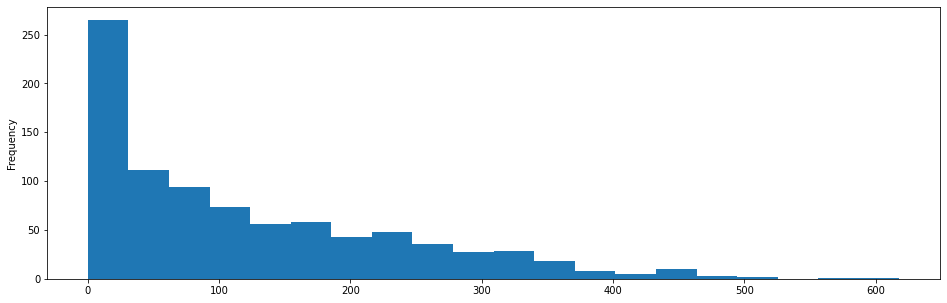

In [40]:
#Histograma de frequência da série de precipitações
df['Precipitacao'].plot.hist(bins = 20)
plt.show()

In [41]:
df['Precipitacao'].skew()

1.0993787383422513

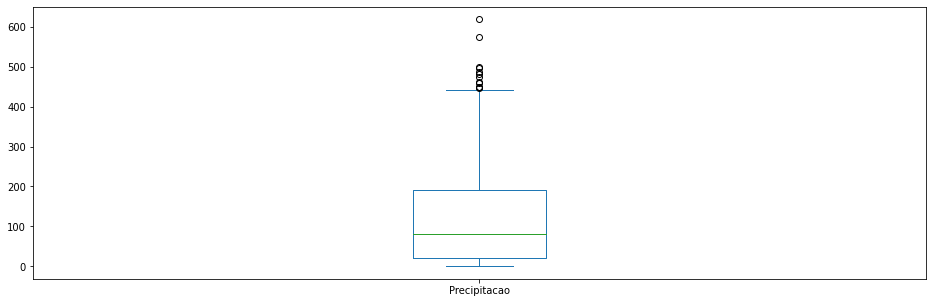

In [56]:
#Diagrama box plot da série de precipitações
df['Precipitacao'].plot.box()
plt.show()

# Relações entre as variáveis

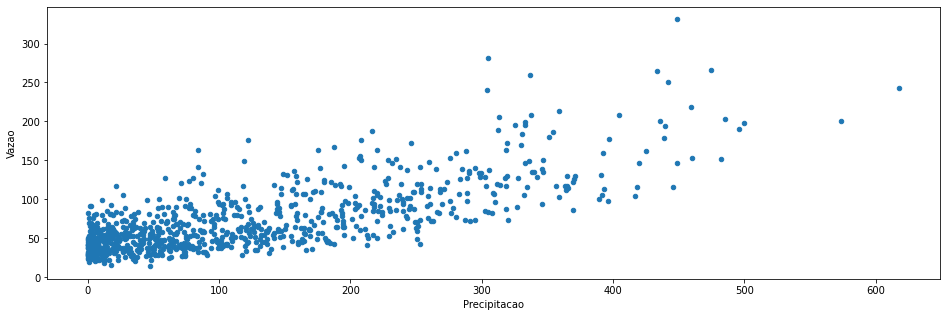

In [43]:
#Gráfico de dispersão entre as variáveis
ax = df.plot.scatter(x = 'Precipitacao', y = 'Vazao')
plt.show()

In [57]:
#Coeficiente de correlação entre as variáveis
corr_df = df.corr()
corr_df

,Vazao,Precipitacao
Vazao,1.000000,0.756723
Precipitacao,0.756723,1.000000


In [45]:
# Excluindo as colunas 'ano' e 'mes' do dataframe
df=df.drop(columns=['ano','mes'])

# Análise da série temporal de vazões

In [47]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

## Avaliação das autocorrelações

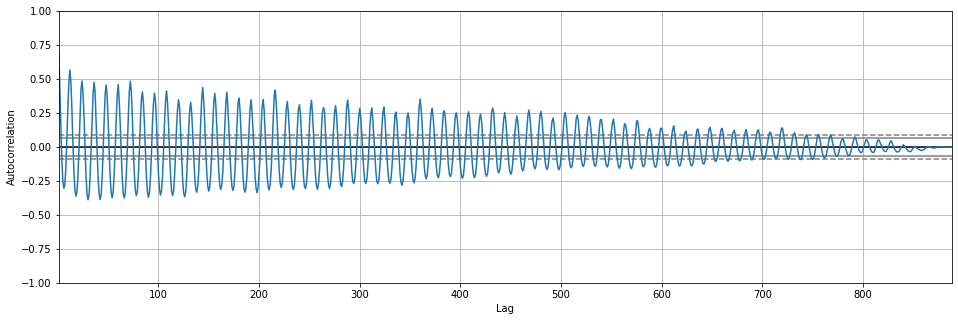

In [48]:
# autocorrelation plot 
autocorrelation_plot(df['Vazao'])
pyplot.show()

In [49]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

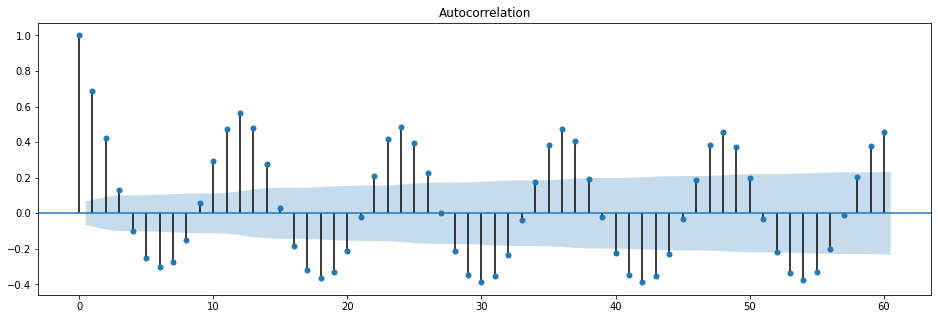

In [50]:
plot_acf(df['Vazao'], lags=60)
pyplot.show()

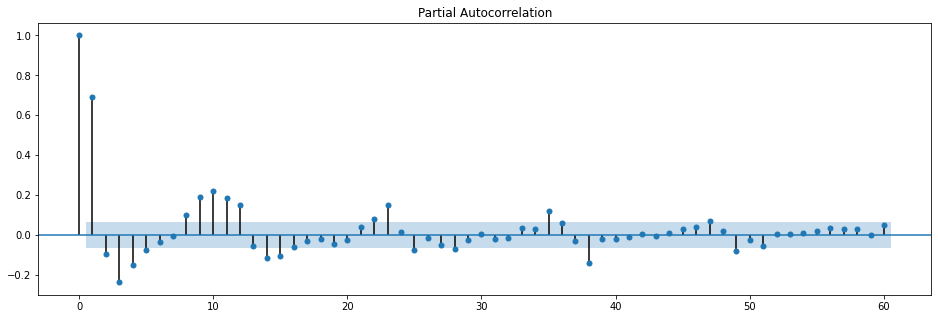

In [51]:
plot_pacf(df['Vazao'], lags=60)
pyplot.show()

## Decomposição da série

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

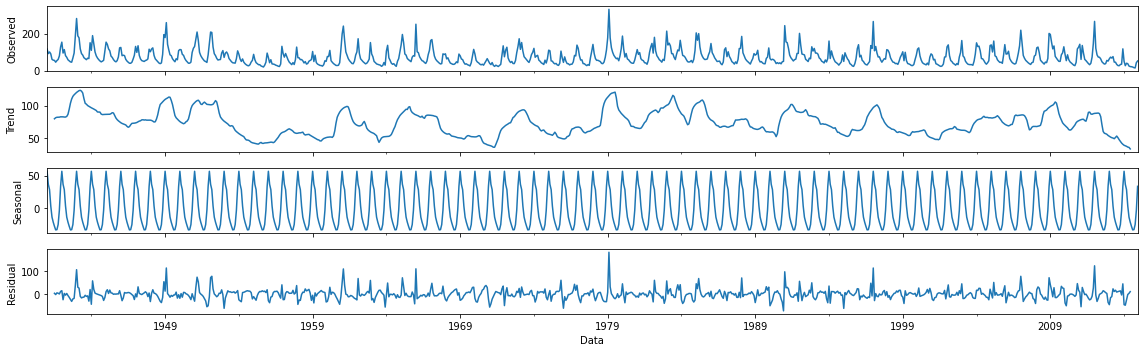

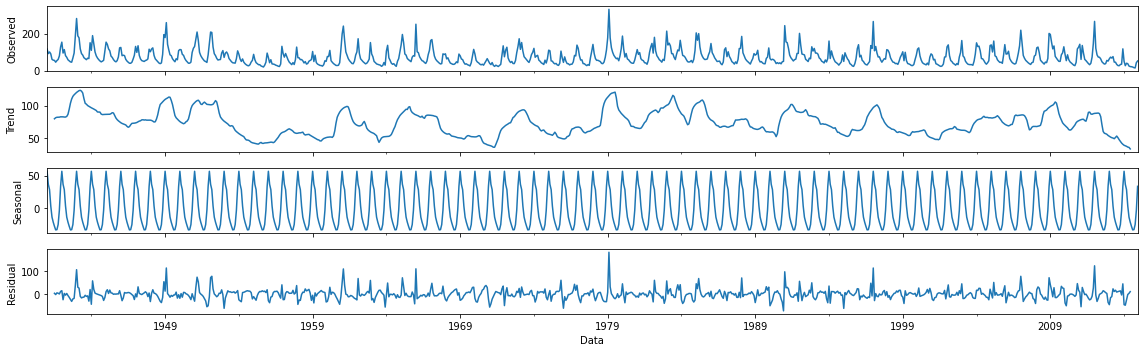

In [53]:
resultado=seasonal_decompose(df['Vazao'], model='additive', freq=12)
resultado.plot()

## Avaliação da estacionariedade da série

In [54]:
from statsmodels.tsa.stattools import adfuller

y = df['Vazao']
result = adfuller(y)
result
print('Estatística ADF: %f' % result[0])
print('p-valor: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

Estatística ADF: -5.291949
p-valor: 0.000006
Valores Críticos:
	1%: -3.438
	5%: -2.865
	10%: -2.569
